## A basic LangGraph Workflow
### Creating functions which will act as nodes in langgraph

In [22]:
def function1(input):
    return input + " from first function"

def function2(input):
    return input + " from second function"

### Creating workflow

In [24]:
from langgraph.graph import Graph

workflow = Graph()
workflow.add_node("func1", function1)
workflow.add_node("func2", function2)
workflow.add_edge("func1","func2")
workflow.set_entry_point("func1")
workflow.set_finish_point("func2")
app = workflow.compile()

In [25]:
app.get_graph()

Graph(nodes={'func1': Node(id='func1', name='func1', data=func1(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'func2': Node(id='func2', name='func2', data=func2(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__start__': Node(id='__start__', name='__start__', data=None, metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='func1', data=None, conditional=False), Edge(source='func1', target='func2', data=None, conditional=False), Edge(source='func2', target='__end__', data=None, conditional=False)])

#### Code to display workflow

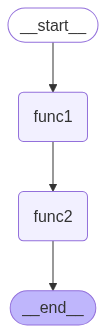

In [26]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
# final output from workflow
app.invoke("hi hello how are you today?")

'hi hello how are you today? from first function from second function'

### To stream output from each node

In [28]:
for output in app.stream("hi this is rohit"):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from func1
_______
hi this is rohit from first function


here is output from func2
_______
hi this is rohit from first function from second function




## A simple Langgraph workflow powered by Gemini LLM

In [29]:
from langchain_google_genai import ChatGoogleGenerativeAI
import os
from dotenv import load_dotenv

load_dotenv()
os.environ['GOOGLE_API_KEY'] = os.getenv('GOOGLE_API_KEY')

# Node 1 - LLM
def llm(input):
    model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')
    output=model.invoke(input)
    return output.content

# Node 2 - Counting Tokens
def token_counter(input):
    token=input.split()
    token_number=len(token)
    return f"total token number in the generated answer is {token_number}"

### Creating Workflow

In [30]:
workflow2 = Graph()
workflow2.add_node("My LLM", llm)
workflow2.add_node("Count Tokens", token_counter)
workflow2.add_edge("My LLM", "Count Tokens")
workflow2.set_entry_point("My LLM")
workflow2.set_finish_point("Count Tokens")
app=workflow2.compile()

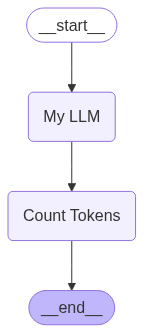

In [31]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [32]:
app.invoke("can you tell me about the india's capital?")

'total token number in the generated answer is 58'

In [33]:
for output in app.stream("tell me about the tata enterpirse in very detail."):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from My LLM
_______
Tata Enterprises, more accurately referred to as the **Tata Group**, is a massive Indian multinational conglomerate headquartered in Mumbai.  It's not a single entity but a network of more than 100 operating companies, under the umbrella of Tata Sons, a holding company.  Understanding its complexity requires looking at several key aspects:

**I. History and Founding:**

The Tata Group's origins trace back to 1868 when Jamsetji Tata, a Parsi entrepreneur, founded the Empress Mills, a textile company in Nagpur.  His vision extended beyond profit, encompassing philanthropy and nation-building.  This ethos of social responsibility continues to define the group today.  Over the decades, the group diversified into various sectors, driven by successive generations of leadership.

**II. Structure and Ownership:**

* **Tata Sons:** This is the primary holding company, owning stakes in various Tata companies.  It's structured as a complex web of holding compani